In [116]:
from datetime import datetime, timedelta
import os
import time
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import doctor
import math
from IPython.display import clear_output
import main
import seaborn as sea
import matplotlib.patches as patches
import matplotlib as mpl

### Open

In [14]:
def plot_candles(candles, signal, fig, ax):
    def add_rectangle(i, open_, close,low, high, ax, sig):
        x = i - .5
        y = min(open_, close)
        height = abs(open_ - close)
        if sig == 'buy':
            color = 'green'
            hatch = 'x'
        if sig == 'sell':
            color = 'red'
            hatch = ''
            
        if sig == 'wait':
            color = 'orange'
            hatch = ''
        ax.add_patch(patches.Rectangle((x, y), .9, height,
                                       fill = open_ <= close, facecolor = color,
                                       edgecolor = color, hatch = hatch ))
        top = max(open_,close)
        bottom = min(open_,close)

        if low < bottom:
            ax.add_line(mpl.lines.Line2D([i,i], [low, bottom], color = color) )

            
        if high > top:
            ax.add_line(mpl.lines.Line2D([i,i], [high, top], color = color) )

        
    for i, index in enumerate(candles.index):
        sig = signal.loc[index]
        row = candles.loc[index]
        add_rectangle(i, row['open'], row['close'],row['low'], row['high'],  ax, sig)
    ax.set_xlim(0, len(candles))
    ax.set_ylim(candles['close'].min() *.998, candles['close'].max() * 1.002)
    return ax

In [42]:
def chartio(gran = 60, cans = False, count = False):
    if type(cans) == type(False):
        cans = aba.get_candles(granularity= gran)
    if count == False:
        count = len(cans)
    mask = cans['open']< cans['close']
    signal = pd.Series(index = cans.index )
    signal.loc[mask] = 'buy'
    signal.loc[~mask] = 'sell'

    
    
    fig, (ax, sig_ax) = plt.subplots(nrows = 2, sharex= False)
    fig.set_size_inches(7, 9)
    plot_candles(cans[-count:], signal[-count:], fig, ax)
    ax.set_xticklabels(cans.index)
    ax2 = ax.twinx()
    cans.iloc[-count:]['volume'].plot(kind = 'bar', ax = ax2, alpha = 0.3)
    

    rsi = aba.get_rsi(cans['close'])
    macd = aba.get_macd(cans)
    rsi.plot(ax = sig_ax, alpha = 0.1)
    ax4 = sig_ax.twinx()
    macd[['macd', 'macd_signal']].plot(ax = ax4)
    plt.show()
    

In [8]:
aba = main.Abathor('LTC-USD')

In [117]:
aba.get_candles(start = datetime.today() - timedelta(days = 3))

AttributeError: 'Abathor' object has no attribute 'time_difference'

In [97]:
candles = aba.get_candles(granularity=60)
x = candles.copy()
x[['low', 'high', 'open', 'close', 'volume']] = np.log(x[['low', 'high', 'open', 'close', 'volume']]).diff().bfill()


In [113]:
percent = .5
print('Percent to find: {}'.format(percent))
candles.loc[x[x['close'] >= percent /100].index]

Percent to find: 0.5


,low,high,open,close,volume,timestamp
time,,,,,,
2018-02-20 07:56:00,238.55,239.89,238.55,239.89,456.473898,1519142160
2018-02-20 07:57:00,239.89,241.12,239.89,241.12,165.236596,1519142220
2018-02-20 08:07:00,242.90,245.24,242.90,245.24,369.625916,1519142820
2018-02-20 08:51:00,244.32,245.70,244.32,245.70,318.631327,1519145460


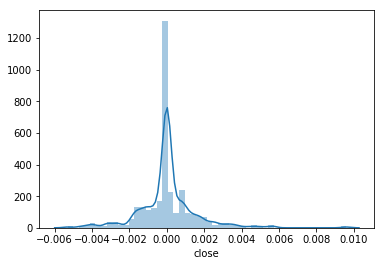

In [114]:
sea.distplot(x['close'])
plt.show()

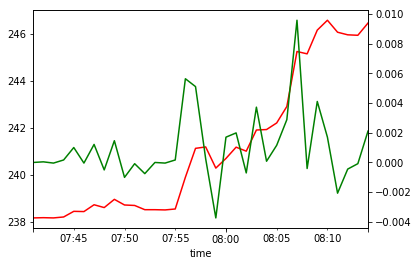

In [88]:


fig, ax = plt.subplots()
candles[20:54]['close'].plot(kind = 'line', ax = ax, color = 'red')
ax2 = ax.twinx()
x[20:54]['close'].plot( kind  = 'line', ax = ax2, color = 'green')

plt.show()